## Week 5: Introduction to neural Networks

### Perceptron learning rule

This week, we will start working with neural networks. For each of the exercises below you can use the method of your choice but you should display the final boundary of your classifier.

#### Exercise 1. 
As a first exercise, load the binary dataset below and code a few steps of the perceptron learning rule. 

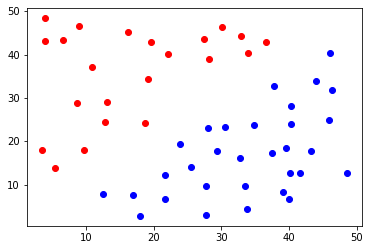

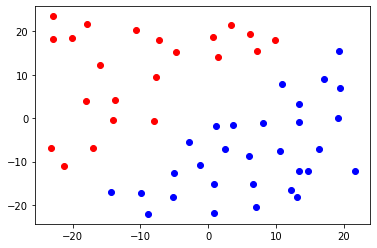

In [13]:
import scipy.io as sio

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

data1 = sio.loadmat('perceptron_data_class1.mat')
data2 = sio.loadmat('perceptron_data_class2.mat')

data1 = data1['perceptron_data_class1']
data2 = data2['perceptron_data_class2']

# put your code here

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.show()


# -sum_{misclassified points} t^(i) (beta_0+ beta_1x_1^i + beta_2x_2^i)

# loop over the misclassified samples beta^{k+1} <-- beta^k + eta*...


target1 = np.ones((np.shape(data1)[0], 1))
target2 = -np.ones((np.shape(data2)[0],1))

target = np.vstack((target1, target2))

data = np.vstack((data1, data2))

center_of_mass = np.mean(data, axis=0)

center_of_mass = np.expand_dims(center_of_mass,1)

centered_data = data - np.matmul(np.ones((np.shape(data)[0],1)), \
                                 center_of_mass.T)



Nclass1 = np.shape(data1)[0] 
Nclass2 = np.shape(data2)[0] 

centered_data1 = centered_data[:Nclass1,:]
centered_data2 = centered_data[Nclass1:,:]

# centered_data contains all the centered points (N1+N2)

plt.scatter(centered_data[:Nclass1,0], \
            centered_data[:Nclass1,1], c='r')
plt.scatter(centered_data[Nclass1:Nclass1+Nclass2-1,0], \
            centered_data[Nclass1:Nclass1+Nclass2-1,1], c='b')
plt.show()



[[2.70690289]
 [2.08111873]]


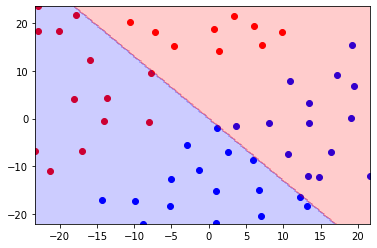

In [15]:

beta = np.random.normal(0, 1, (2,1))
print(beta)

beta0 = 0

beta = np.vstack((beta0,beta))


x1min = np.min(centered_data[:,0])
x1max = np.max(centered_data[:,0])

x2min = np.min(centered_data[:,1])
x2max = np.max(centered_data[:,1])

xx, yy = np.meshgrid(np.linspace(x1min, x1max, 200), np.linspace(x2min, x2max, 200))



Xtilde_tmp = np.hstack((np.expand_dims(xx.flatten(),1), np.expand_dims(yy.flatten(),1)))

Xtilde = np.hstack((np.ones((len(xx.flatten()),1)) ,Xtilde_tmp))

prediction = np.matmul(Xtilde, beta)

# short trick to turn the real prediction into a +1/-1 value
# if prediction is >0 then (prediction>0) = 1 ==> 2(prediction>0) -1 = 1
# if prediction is <0 then (prediction>0) = 0 ==> 2(prediction>0)-1 = -1

final_prediction = (prediction > 0) *2 -1


plt.scatter(centered_data[:Nclass1,0], \
            centered_data[:Nclass1,1], c='r')
plt.scatter(centered_data[Nclass1:Nclass1+Nclass2-1,0], \
            centered_data[Nclass1:Nclass1+Nclass2-1,1], c='b')
plt.contourf(xx, yy, np.reshape(final_prediction, \
                                np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()

In [16]:
target = np.squeeze(target)
beta = np.squeeze(beta)

dataTilde = np.hstack((np.ones((np.shape(data)[0],1)), centered_data))

predicted_target_trainingData_tmp = np.matmul(dataTilde, beta)


predicted_target_trainingData = \
(predicted_target_trainingData_tmp > 0) *2 -1


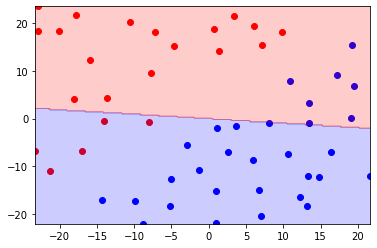

In [17]:
misclassified_points = \
centered_data[np.squeeze(np.not_equal(target, \
                             predicted_target_trainingData)),:]

misclassified_targets = target[np.squeeze(np.not_equal(target, \
                             predicted_target_trainingData))]

xi = misclassified_points[0,:]
ti = misclassified_targets[0]
xitilde = np.hstack((1, xi))

lr = 0.1


beta = np.add(beta,lr*ti*xitilde)

prediction = np.matmul(Xtilde, beta)
final_prediction = (prediction > 0) *2 -1
plt.scatter(centered_data[:Nclass1,0], \
            centered_data[:Nclass1,1], c='r')
plt.scatter(centered_data[Nclass1:Nclass1+Nclass2-1,0], \
            centered_data[Nclass1:Nclass1+Nclass2-1,1], c='b')
plt.contourf(xx, yy, np.reshape(final_prediction, \
                                np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()


In [18]:
max_iter = 20

predicted_target_trainingData_tmp = np.matmul(dataTilde, beta)

predicted_target_trainingData = \
(predicted_target_trainingData_tmp > 0) *2 -1
misclassified_points = \
centered_data[np.squeeze(np.not_equal(target, \
                         predicted_target_trainingData)),:]

misclassified_targets = target[np.squeeze(np.not_equal(target, \
                         predicted_target_trainingData))]

while(len(misclassified_targets)>0):
    
    xi = misclassified_points[0,:]
    ti = misclassified_targets[0]
    xitilde = np.hstack((1, xi))

    lr = 0.1
    beta = np.add(beta,lr*ti*xitilde)
    
    predicted_target_trainingData_tmp = np.matmul(dataTilde, beta)

    predicted_target_trainingData = \
    (predicted_target_trainingData_tmp > 0) *2 -1
    misclassified_points = \
    centered_data[np.squeeze(np.not_equal(target, \
                             predicted_target_trainingData)),:]
    
    misclassified_targets = target[np.squeeze(np.not_equal(target, \
                             predicted_target_trainingData))]
    

In [19]:
print(misclassified_targets)

[]


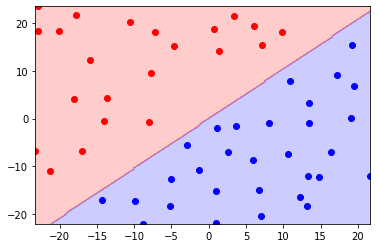

In [20]:
prediction = np.matmul(Xtilde, beta)
final_prediction = (prediction > 0) *2 -1
plt.scatter(centered_data[:Nclass1,0], \
            centered_data[:Nclass1,1], c='r')
plt.scatter(centered_data[Nclass1:Nclass1+Nclass2-1,0], \
            centered_data[Nclass1:Nclass1+Nclass2-1,1], c='b')
plt.contourf(xx, yy, np.reshape(final_prediction, \
                                np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()

#### Exercise 2.

__2a.__ Load the data below. Using the neural_network module from scikit-learn and its MLPClassifier model, learn a classifier, for the dataset below using 

- One hidden layer with a linear activation function and 
    - One neuron
    - Two neurons
    
    
    
- One hidden layer with a non linear activation function (take Relu for example or a binary step)
    - One neuron
    - Two neurons

How many neurons, hidden layers do you need to learn the distribution of the data? Do you have an idea why?

Try increasing the number of neurons and hidden layers. Then try different values of the learning rate. 


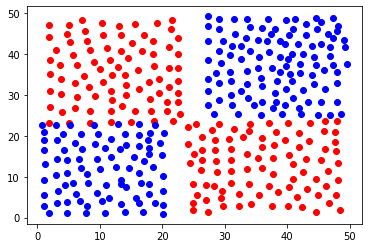

In [93]:
import scipy.io as sio
data1 = sio.loadmat('neural_net_class1.mat')
data2 = sio.loadmat('neural_net_class2.mat')

data1 = data1['neural_net_class1']
data2 = data2['neural_net_class2']

from sklearn.neural_network import MLPClassifier

# put your code here


plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.show()

In [95]:
print(np.shape(target1))
print(np.shape(target2))

(172, 1)
(195, 1)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


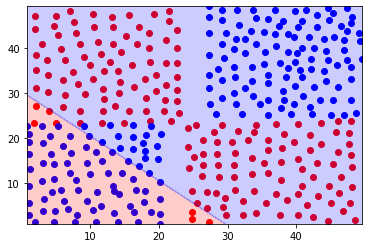

In [109]:
data = np.vstack((data1, data2))
target1 = np.ones((np.shape(data1)[0],1))
target2 = np.zeros((np.shape(data2)[0],1))

target = np.vstack((target1, target2))



from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

my_classifier = MLPClassifier(max_iter=1000, \
                              hidden_layer_sizes = (1,), \
                              activation = 'logistic', solver = 'lbfgs')
my_classifier.fit(data, target)


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

xx, yy = np.meshgrid(np.linspace(x1min,x1max, 100), np.linspace(x2min, x2max, 100))

Xprediction = np.vstack((xx.flatten(), yy.flatten()))
Xprediction = Xprediction.T
predicted_targets = my_classifier.predict(Xprediction)

plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.contourf(xx, yy, np.reshape(predicted_targets>0.5, np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


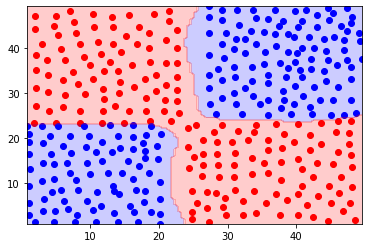

In [115]:
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

my_classifier = MLPClassifier(max_iter=2000, \
                              hidden_layer_sizes = (50,50), \
                              activation = 'logistic', solver = 'lbfgs', alpha = .1)
my_classifier.fit(data, target)


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

xx, yy = np.meshgrid(np.linspace(x1min,x1max, 100), np.linspace(x2min, x2max, 100))

Xprediction = np.vstack((xx.flatten(), yy.flatten()))
Xprediction = Xprediction.T
predicted_targets = my_classifier.predict(Xprediction)

plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.contourf(xx, yy, np.reshape(predicted_targets>0.5, np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()


__2b.__ Keep the dataset from above. try to change the intialization of the training algorithm. Plot the resulting classifier for a couple of different initializations. What do you see?

Do it for a small network first. Then repeat those experiments for larger architectures. I.e. increase the number of neurons and the number of layers. What do you see when you change the initialization?


In [ ]:

# put your code here

#### Exercise 3. 

__3a.__Load the data below. Try to build the best neural network you can for this dataset. Split the data between a training and a test set and evaluate the models you built. What is the best validation error you can get?


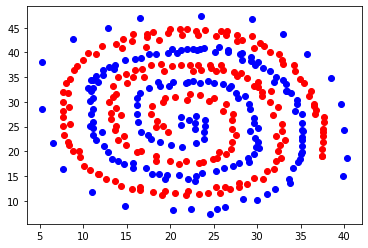

In [116]:

import scipy.io as sio
data1 = sio.loadmat('neural_net_ex2_class1.mat')
data2 = sio.loadmat('neural_net_ex2_class2.mat')

data1 = data1['neural_net_ex2_class1']
data2 = data2['neural_net_ex2_class2']

from sklearn.neural_network import MLPClassifier



plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.show()

# put your code here

In [122]:
data = np.vstack((data1, data2))
target1 = np.ones((np.shape(data1)[0],1))
target2 = np.zeros((np.shape(data2)[0],1))

target = np.vstack((target1, target2))

from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

my_classifier = MLPClassifier(max_iter=40000, \
                              hidden_layer_sizes = (100,100), \
                              activation = 'tanh', solver = 'lbfgs', alpha=0.15)
my_classifier.fit(data, target)


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

xx, yy = np.meshgrid(np.linspace(x1min,x1max, 100), np.linspace(x2min, x2max, 100))

Xprediction = np.vstack((xx.flatten(), yy.flatten()))
Xprediction = Xprediction.T
predicted_targets = my_classifier.predict(Xprediction)




/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


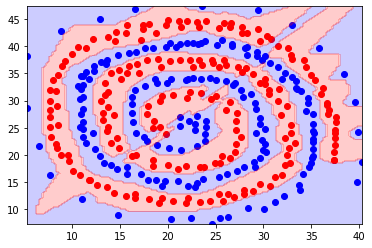

In [123]:
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.contourf(xx, yy, np.reshape(predicted_targets>0.5, np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()


__3b.__ With the same dataset, add additional features to your model, e.g. $\sin(x), \sin(y)$ or other monomials. Can you improve your classifier ?

In [ ]:
# put your code here


